In [233]:
import pandas as pd 
import numpy as np 
from scipy import stats

In [234]:
Data = pd.read_csv("Customer_Segmentation_for_Marketing_Campaigns.csv")
Data.head()

,Customer_id,Age,Gender,Location,Annual_Income,Purchase_Frequency,Total_Spend,Average_purchase,Engagement,Category
0,cust0001,56,Male,Europe,98213,3,888.26,296.09,86,Home Decor
1,cust0002,46,Female,Asia,137407,9,1180.25,131.14,67,Health & Beauty
2,cust0003,32,Female,Europe,38268,12,3076.43,256.37,90,Home Decor
3,cust0004,60,Female,Europe,97866,4,1209.57,302.39,17,Electronics
4,cust0005,25,Male,Europe,106269,13,5704.18,438.78,20,Health & Beauty


In [235]:
Data.isnull()

,Customer_id,Age,Gender,Location,Annual_Income,Purchase_Frequency,Total_Spend,Average_purchase,Engagement,Category
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [236]:
Data.isnull().sum()

Customer_id           0
Age                   0
Gender                0
Location              0
Annual_Income         0
Purchase_Frequency    0
Total_Spend           0
Average_purchase      0
Engagement            0
Category              0
dtype: int64

In [237]:
Data.isnull().any()

Customer_id           False
Age                   False
Gender                False
Location              False
Annual_Income         False
Purchase_Frequency    False
Total_Spend           False
Average_purchase      False
Engagement            False
Category              False
dtype: bool

In [238]:
from scipy import stats

In [239]:
Column_To_Check = ['Age', 'Annual_Income', 'Purchase_Frequency', 'Total_Spend', 'Engagement']
z_scores = np.abs(stats.zscore(Data[Column_To_Check]))
z_scores

,Age,Annual_Income,Purchase_Frequency,Total_Spend,Engagement
0,1.112882,0.429235,1.099744,0.763714,1.304983
1,0.371652,1.472596,0.380396,0.575984,0.638047
2,0.666069,1.166527,1.120466,0.643131,1.445391
3,1.409373,0.419998,0.853054,0.557134,1.117048
4,1.184929,0.643689,1.367156,2.332596,1.011742
...,...,...,...,...,...
995,1.407298,0.233162,0.359674,0.128838,0.462538
996,0.073085,1.607562,1.613846,0.695420,0.251926
997,1.036683,1.246016,0.359674,0.525443,1.480493
998,1.483496,0.606341,1.613846,0.701472,0.041315


In [240]:
outlier = Data[(z_scores > 3).any(axis = 1)]
outlier

,Customer_id,Age,Gender,Location,Annual_Income,Purchase_Frequency,Total_Spend,Average_purchase,Engagement,Category
217,cust0218,49,Female,Asia,129787,14,6757.53,482.68,82,Health & Beauty
253,cust0254,28,Female,North America,132990,14,6886.91,491.92,93,Clothing
364,cust0365,40,Female,North America,102368,14,6922.26,494.45,61,Health & Beauty


In [241]:
Data = Data[(z_scores < 3).all(axis = 1)]
Data

,Customer_id,Age,Gender,Location,Annual_Income,Purchase_Frequency,Total_Spend,Average_purchase,Engagement,Category
0,cust0001,56,Male,Europe,98213,3,888.26,296.09,86,Home Decor
1,cust0002,46,Female,Asia,137407,9,1180.25,131.14,67,Health & Beauty
2,cust0003,32,Female,Europe,38268,12,3076.43,256.37,90,Home Decor
3,cust0004,60,Female,Europe,97866,4,1209.57,302.39,17,Electronics
4,cust0005,25,Male,Europe,106269,13,5704.18,438.78,20,Health & Beauty
...,...,...,...,...,...,...,...,...,...,...
995,cust0996,22,Male,South America,73330,6,1875.73,312.62,62,Clothing
996,cust0997,40,Male,Europe,142477,14,3157.76,225.55,56,Electronics
997,cust0998,27,Female,North America,35282,6,1258.86,209.81,91,Electronics
998,cust0999,61,Male,South America,104866,14,985.07,70.36,50,Clothing


In [205]:
from sklearn.preprocessing import MinMaxScaler

In [242]:
numerical_features = ['Purchase_Frequency', 'Total_Spend', 'Annual_Income']
scaler = MinMaxScaler()

In [243]:
Data[numerical_features] = scaler.fit_transform(Data[numerical_features])
Data

,Customer_id,Age,Gender,Location,Annual_Income,Purchase_Frequency,Total_Spend,Average_purchase,Engagement,Category
0,cust0001,56,Male,Europe,0.601390,0.153846,0.125203,296.09,86,Home Decor
1,cust0002,46,Female,Asia,0.903356,0.615385,0.169150,131.14,67,Health & Beauty
2,cust0003,32,Female,Europe,0.139550,0.846154,0.454541,256.37,90,Home Decor
3,cust0004,60,Female,Europe,0.598716,0.230769,0.173563,302.39,17,Electronics
4,cust0005,25,Male,Europe,0.663457,0.923077,0.850040,438.78,20,Health & Beauty
...,...,...,...,...,...,...,...,...,...,...
995,cust0996,22,Male,South America,0.409681,0.384615,0.273826,312.62,62,Clothing
996,cust0997,40,Male,Europe,0.942417,1.000000,0.466782,225.55,56,Electronics
997,cust0998,27,Female,North America,0.116544,0.384615,0.180982,209.81,91,Electronics
998,cust0999,61,Male,South America,0.652647,1.000000,0.139774,70.36,50,Clothing


In [244]:
featurs_for_clustring = ['Age', 'Annual_Income', 'Purchase_Frequency', 'Total_Spend', 'Engagement']
Data_Clustring = Data[featurs_for_clustring]
Data_Clustring

,Age,Annual_Income,Purchase_Frequency,Total_Spend,Engagement
0,56,0.601390,0.153846,0.125203,86
1,46,0.903356,0.615385,0.169150,67
2,32,0.139550,0.846154,0.454541,90
3,60,0.598716,0.230769,0.173563,17
4,25,0.663457,0.923077,0.850040,20
...,...,...,...,...,...
995,22,0.409681,0.384615,0.273826,62
996,40,0.942417,1.000000,0.466782,56
997,27,0.116544,0.384615,0.180982,91
998,61,0.652647,1.000000,0.139774,50


In [210]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

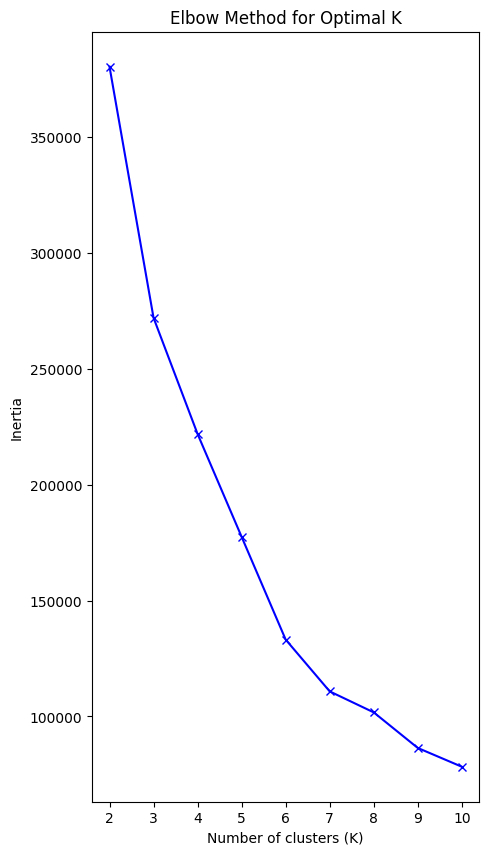

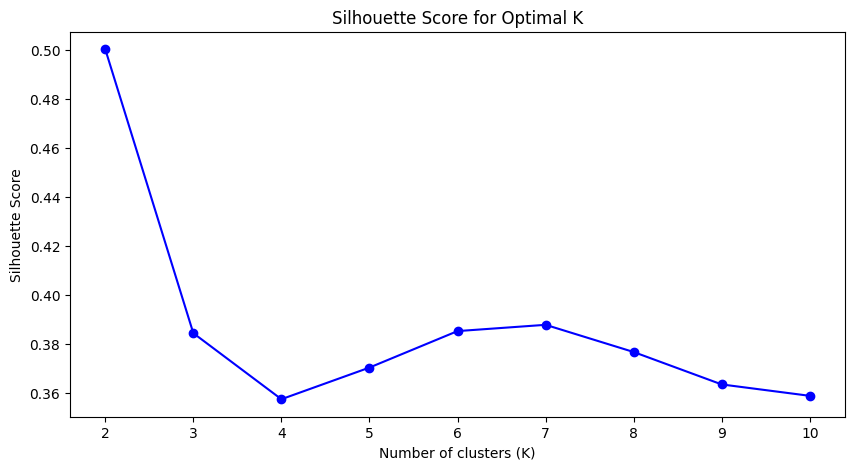

In [211]:
k_values = range(2, 11)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Data_Clustring) 
    
    
    inertia.append(kmeans.inertia_)
    score = silhouette_score(Data_Clustring, kmeans.labels_)
    silhouette_scores.append(score)





plt.figure(figsize=(5, 10))
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [213]:
optimal_k = 4
kmeans = KMeans(n_clusters = optimal_k, random_state = 42)
Data_Clustring
Data_Clustring.loc[:, 'Cluster'] = kmeans.fit_predict(Data_Clustring)
Data_Clustring.head()



,Age,Annual_Income,Purchase_Frequency,Total_Spend,Engagement,Cluster
0,56,0.601390,0.153846,0.125203,86,2
1,46,0.903356,0.615385,0.169150,67,0
2,32,0.139550,0.846154,0.454541,90,2
3,60,0.598716,0.230769,0.173563,17,1
4,25,0.663457,0.923077,0.850040,20,3


In [214]:
from sklearn.decomposition import PCA

In [215]:
pca = PCA(n_components = 2)

In [216]:
pca_components = pca.fit_transform(Data_Clustring.drop(columns = 'Cluster'))

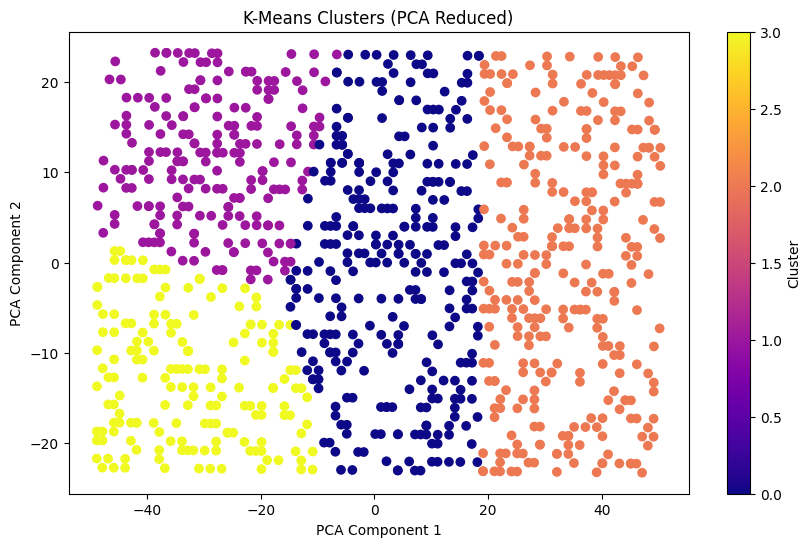

In [217]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=Data_Clustring['Cluster'], cmap='plasma')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters (PCA Reduced)')
plt.colorbar(label='Cluster')
plt.show()

In [230]:
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=Data_Clustring.columns[:6])

centroids_df

,Age,Annual_Income,Purchase_Frequency,Total_Spend,Engagement,Cluster
0,40.673203,0.468005,0.500251,0.288209,51.869281,0.052288
1,52.200957,0.463592,0.479573,0.300740,20.287081,1.000000
2,40.832258,0.473270,0.475931,0.299196,82.841935,2.874194
3,28.226744,0.511633,0.540250,0.332087,16.244186,2.000000


In [229]:
cluster_summary = Data_Clustring.groupby('Cluster').mean()
cluster_summary

,Age,Annual_Income,Purchase_Frequency,Total_Spend,Engagement
Cluster,,,,,
0,40.673203,0.468005,0.500251,0.288209,51.869281
1,52.200957,0.463592,0.479573,0.300740,20.287081
2,40.832258,0.473270,0.475931,0.299196,82.841935
3,28.226744,0.511633,0.540250,0.332087,16.244186


In [231]:
Data_Clustring.to_csv('Customer_Segmentation_Final.csv', index=False)

In [232]:
Data_Clustring.to_csv('Customer_Segmentation_Final.csv', index=False, sep=',')